In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Defining the constants
P = 6
N = 2**P
U0 = 0.1
h = 1/N

In [3]:
#Construction of \hat{T}_h
hat_Th = np.zeros((N+1,N+1), dtype=np.float32)
hat_Th[0,0] = h**2
hat_Th[-1,-1] = h**2
Th = 4*np.eye(N-1)-np.eye(N-1, k=-1)-np.eye(N-1, k=1)

hat_Th[1:-1,1:-1] = Th

hatI = np.eye(N+1, dtype=np.int8)
hatI[0,0] = 0
hatI[-1,-1]=0

In [4]:
#Ah = np.zeros((N+1)**2) #Initialise array of zeroes to fill
"""
If we make this complexer we can tactically use different array-types to make this more memory efficient
"""

main_diag = np.eye((N+1), k=0, dtype=np.int8)
main_diag[0,0], main_diag[-1,-1] = 0, 0

Ah_ = np.kron(main_diag, hat_Th)
np.save("Ah_"+str(N+1),Ah_)
main_diag = None
Ah_ = None

off_diag = np.eye((N+1), k=1) + np.eye((N+1), k=-1, dtype=np.int8)
off_diag[0,1], off_diag[1,0], off_diag[-1,-2], off_diag[-2,-1] = 0, 0, 0, 0

tmp = - np.kron(off_diag, hatI)
off_diag = None
Ah_ = np.load("Ah_"+str(N+1)+".npy")
Ah_ += tmp

tmp = None

Ah_[0:N+1,0:N+1], Ah_[-(N+1):,-(N+1):] = h**2 * np.eye(N+1), h**2 * np.eye(N+1)

Ah = Ah_/(h**2)
Ah_ = None

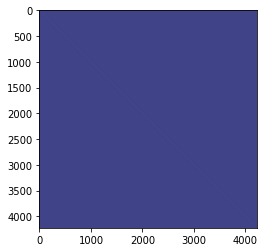

In [5]:
plt.imshow(Ah)

In [6]:
#Creating the forcing function
x, y = np.linspace(0,1,N+1), np.linspace(0,1,N+1)
Y, X = np.meshgrid(x, y)

arrayF_i = (X**2 +Y**2)*np.sin(X*Y) #This array has the wrong ordering with (0,0) top left


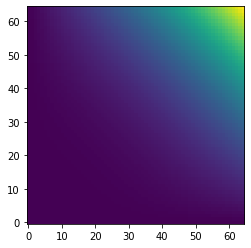

In [7]:
plt.imshow(arrayF_i, origin='lower')

In [8]:
arrayF_b = U0 * np.ones(arrayF_i.shape)


In [9]:
arrayF_b[1:-1,1:-1] = arrayF_i[1:-1,1:-1]


In [10]:
vecF = arrayF_b.flatten()


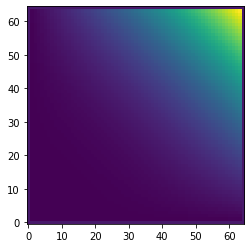

In [11]:
plt.imshow(arrayF_b, origin='lower')


In [12]:
#Cholesky decomposition of Ah
C = np.linalg.cholesky(Ah)
L = C
U = C.T



In [13]:
u_prime	= np.linalg.solve(U, vecF)
u	= np.linalg.solve(L, u_prime)
test	= np.linalg.solve(Ah, vecF)

In [14]:
array_u = u.reshape((N+1,N+1))

In [15]:
u_ex = np.sin(X*Y)
u_ex_b = U0+0*u_ex
u_ex_b[1:-1,1:-1] = u_ex[1:-1,1:-1]
vec_u_ex = u_ex_b.flatten()

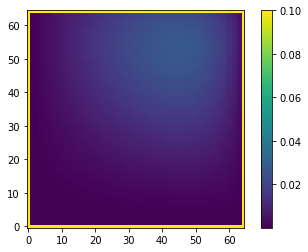

In [16]:
plt.imshow(array_u, origin='lower')
plt.colorbar()

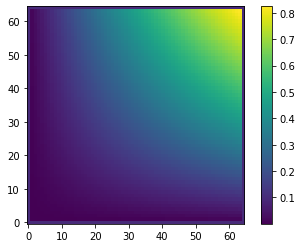

In [17]:
plt.imshow(u_ex_b, origin='lower')
plt.colorbar()

In [18]:
error = np.sqrt(h**2 *np.sum((vec_u_ex-u)**2))
print("h**2: {:.4f}\t error: {:.4f}".format(h**2, error))

h**2: 0.0002	 error: 0.2959


In [19]:
4/(h**2)

16384.0